# 创建分类器

        分类器可以是实现分类功能的任意算法，最简单的分类器就是简单的数学函数。在真实世界中，分类器可以是非常复杂的形式。在学习过程中，可以看到二元（binary）分类器，将数据分成两类，也可以看到多元（multiclass）分类器，将数据分成两个以上的类型。解决分类问题的数据手段都倾向于解决二元分类问题，可以通过不同的形式对其进行扩展，进而解决多元分类问题。分类器准确性的估计是机器学习领域的重要内容。我们需要学会如何使用现有的数据获取新的思路（机器学习模型），然后把模型应用到真实世界中。

## 2.1建立简单分类器
    数据点很少，可以直观地判断分割线。

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
#创建一些样本数据
X = np.array([[3, 1], [2, 10], [3, 8], [6,4], [7, 2], [4, 5], [4, 7], [4, -1]])

In [3]:
#为数据点分配标记
y = [0, 1, 1, 0, 0, 1, 1, 0]

    因为只有两个类，所以y列表包含0和1。一般情况下，如果你有N个类，那么y的取值范
    围就是从0到N-1。

In [4]:
#接下来按照类型标记把样本数据分成两类
class_0 = np.array([X[i] for i in range(len(X)) if y[i] == 0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i] == 1] )

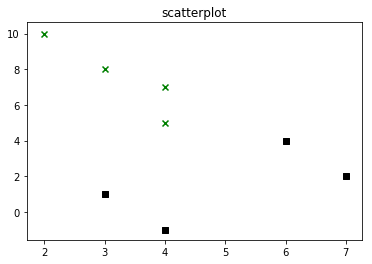

In [5]:
#画图
plt.figure()
plt.rcParams['figure.figsize'] = (8.0, 4.0) # 设置figure_size尺寸
plt.scatter(class_0[:,0], class_0[:,1], color='black', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], color='green', marker='x')
plt.title('scatterplot')
plt.show()

##### 这是一个散点图（scatterplot），用方块和叉表示两类数据。在前面的代码中，参数marker
##### 用来表示数据点的形状。用方块表示class_0的数据，用叉表示class_1的数据。

#### 上图只是用变量X与y之间的映射关系创建了两个列表。如果要你直观
#### 地展示数据点的不同类型，在两类数据间画一条分割线。

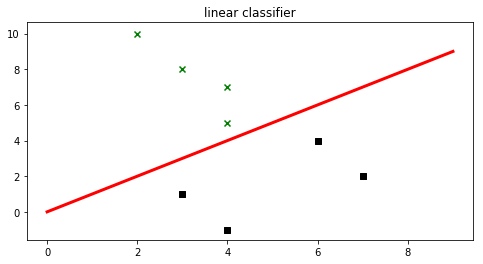

In [6]:
#用数学公式y = x创建一条直线。
line_x = range(10)
line_y = line_x

#画图
#画图
plt.figure()
plt.rcParams['figure.figsize'] = (8.0, 4.0) # 设置figure_size尺寸
plt.scatter(class_0[:,0], class_0[:,1], color='black', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], color='green', marker='x')
plt.plot(line_x, line_y, color='red',linewidth=3)
plt.title('linear classifier')
plt.show()

    建立了一个简单的分类器：如果输入点(a, b)的a大于或等于b，那么它属于类型class_0；
    反之，它属于class_1。如果对数据点逐个进行检查，你会发现每个数都是这样，这样你
    就建立了一个可以识别未知数据的线性分类器（linear classifier）。之所以称其为线
    性分类器，是因为分割线是一条直线。如果分割线是一条曲线，就是非线性分类器（nonlinear classifier）。

## 2.2 建立逻辑回归分类器
    逻辑回归是一种分类方法。给定一组数据点，需要建立一个可以在类之间绘制线性边界的模型。
    逻辑回归就可以对训练数据派生的一组方程进行求解来提取边界。

In [7]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

#定义画图函数
def plot_classifier(classifier, X, y):
    #定义图形范围
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    
    #定义网格
    
    # 设置网格数据的步长
    step_size = 0.01

    #变量x_values和y_values包含求解方程数值的网格点。
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
    
    # 计算分类器输出结果
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    
    #数组维度变形
    mesh_output = mesh_output.reshape(x_values.shape)
    
    #用case图画出分类结果
    plt.figure()
    plt.rcParams['figure.figsize'] = (10.0, 7.0) # 设置figure_size尺寸
    
    #选择配色方案
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)
    
    # 把训练数据点画砸图上
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)
    
    #设置图形的取值范围
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())
    
    #设置X轴与y轴
    plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))
    plt.show()

    预测值表示我们在图形中想要使用的数值范围，通常是从最小值到最大值。
    我们增加了一些余量（buffer），例如上面代码中的1.0。
    是一个三维画图器，既可以画二维数据点，又可以用色彩清单（color scheme）表
    示不同区域的相关属性。你可以在http://matplotlib.org/examples/color/colormaps_reference.html 找
    到所有的色彩清单。
    plt.scatter把数据点画在二维图上。X[:, 0]表示0轴（X轴）的坐标值，X[:, 1]
    表示1轴（Y轴）的坐标值。c=y表示颜色的使用顺序。用目标标记映射cmap的颜色表。我们肯定
    希望不同的标记使用不同的颜色，因此，用y作为映射。坐标轴的取值范围由plt.xlim和plt.ylim
    确定。为了标记坐标轴的数值，需要使用plt.xticks和plt.yticks。在坐标轴上标出坐标值，
    就可以直观地看出数据点的位置。在前面的代码中，我们希望坐标轴的最大值与最小值之前的刻度
    是单位刻度，还希望这些刻度值是整数，因此用int()函数对最值取整。

In [8]:
#创建一些带训练标记的样本数据
X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2], [1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2]])

#假设共分为3类
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

#初始化一个逻辑回归分类器
classifier = linear_model.LogisticRegression(solver='liblinear', C=100)
#训练分类器
classifier.fit(X, y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### 前面的函数有一些输入参数需要设置，但是最重要的两个参数是solver和C。
##### 参数solver用于设置求解系统方程的算法类型;
##### 参数C表示正则化强度，数值越小，表示正则化强度越高。

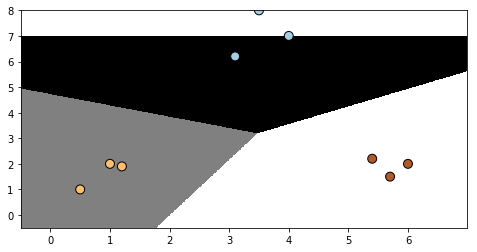

In [9]:
#画图
plot_classifier(classifier, X, y)

##### 参数C对模型的影响。
    参数C表示对分类错误（misclassification）的惩罚值（penalty）。
    随着参数C的不断增大，分类错误的惩罚值越高。因此，各个类型的边界更优。

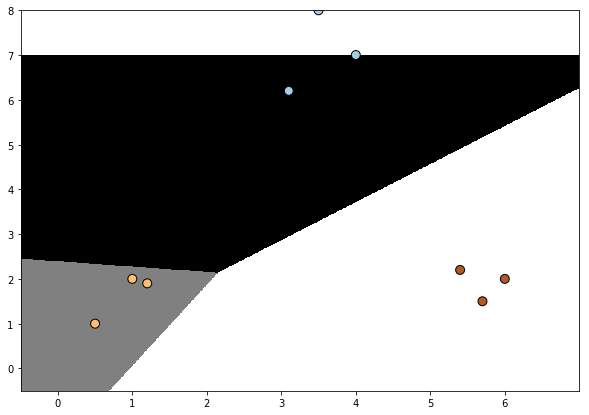

In [10]:
#初始化一个逻辑回归分类器
classifier = linear_model.LogisticRegression(solver='liblinear', C=1)
#训练分类器
classifier.fit(X, y)
#画图
plot_classifier(classifier, X, y)

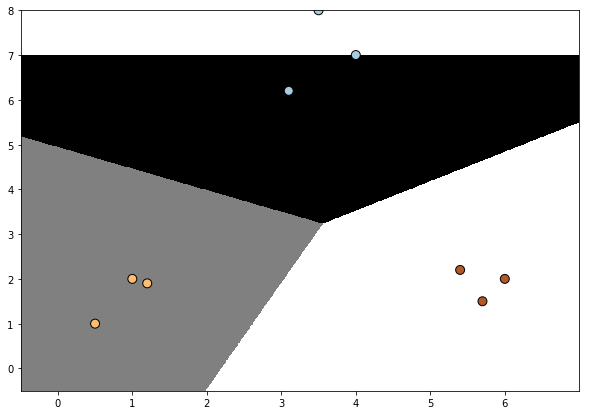

In [11]:
#初始化一个逻辑回归分类器
classifier = linear_model.LogisticRegression(solver='liblinear', C=1000)
#训练分类器
classifier.fit(X, y)
#画图
plot_classifier(classifier, X, y)

## 2.2建立朴素贝叶斯分类器
    朴素贝叶斯分类器是用贝叶斯定理进行建模的监督学习分类器。

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB 


In [13]:
input_file = 'data_multivar.txt'

#打开数据
X , y = [], []
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = [float(x) for x in line.split(',')]
        X.append(data[:-1])
        y.append(data[-1])
X = np.array(X)
y = np.array(y)


In [14]:
#建立朴素贝叶斯分类器
classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X, y)
y_pred = classifier_gaussiannb.predict(X)

##### GaussianNB函数指定了正态分布朴素贝叶斯模型（Gaussian Naive Bayes model）

In [15]:
#计算分类器的准确性
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print ("Accuracy of the classifier =", round(accuracy, 2), "%")

Accuracy of the classifier = 99.5 %


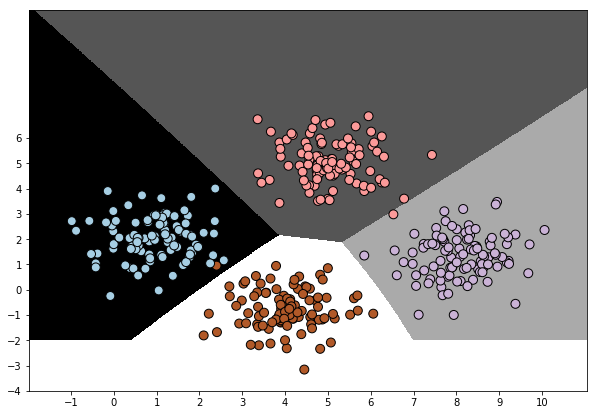

In [16]:
#画出数据点和边界
plot_classifier(classifier_gaussiannb, X, y)

    从图中可以发现，这里的边界没有严格地区分所有数据点。在前面这个例子中，我们是对所有的数据进行训练。
    机器学习的一条最佳实践是用没有重叠（nonoverlapping）的数据进行训练和测试。
    理想情况下，需要一些尚未使用的数据进行测试，可以方便准确地评估模型在未知数据上的执行情况。
    scikit-learn有一个方法可以非常好地解决这个问题，将数据合理地分割成训练数据集和测试数据集。

## 将数据集分割成训练集和测试集

In [17]:
from sklearn import cross_validation
X_train, X_test, y_tran, y_test = cross_validation.train_test_split(X, y, test_size=0.25, random_state=5)
classifier_gaussiannb_new = GaussianNB()
classifier_gaussiannb_new.fit(X_train, y_tran)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


GaussianNB(priors=None)

参数test_size设置成0.25，表示分配了25%的数据给测试数据集。剩下75%的数据将用于训练数据集。

In [18]:
#用分类器度测试数据进行测试
y_test_pred = classifier_gaussiannb_new.predict(X_test)

#计算分类器的准确性
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print ("Accuracy of the classifier =", round(accuracy, 2), "%")

Accuracy of the classifier = 98.0 %


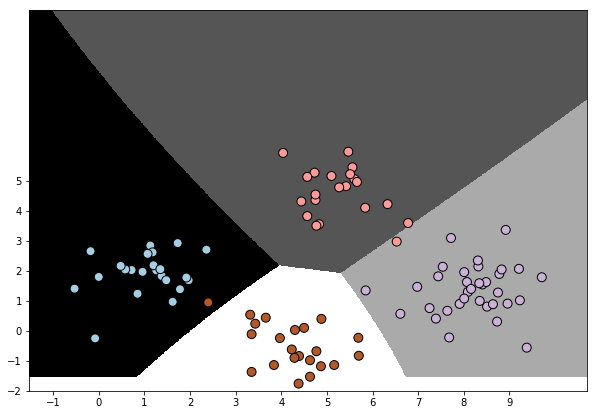

In [19]:
#画出测试数据的数据点及其边界
plot_classifier(classifier_gaussiannb_new, X_test, y_test)

## 2.3用交叉验证检验模型准确性

    交叉验证是机器学习的重要概念。在上一节中，我们把数据分成了训练数据集和测试数据集。
    然而，为了能够让模型更加稳定，还需要用数据集的不同子集进行反复的验证。如果只是对特定的子集进行微调，最终可能会过度拟合（overfitting）模型。过度拟合是指模型在已知数据集上拟合得超级好，但是一遇到未知数据就挂了。我们真正想要的，是让机器学习模型能够适用于未知数据。

    当处理机器学习模型时，通常关心3个指标：精度（precision）、召回率（recall）和F1 得分（F1 score）。可以用参数评价标准（parameter scoring）获得各项指标的得分。精度是指被分类器正确分类的样本量占分类器总分类器样本数量的百分比（分类器分类结果中，有一些样本分错了）。召回率是指被应正确分类的样本数量占某分类总样本数量的百分比（有一些样本属于某分类，但分类器却没有分出来）。

In [20]:
#计算精度
num_valdations = 5
accuracy = cross_validation.cross_val_score(classifier_gaussiannb, X, y, scoring='accuracy', cv=num_valdations)

In [21]:
print("Accuracy = " + str(round(100 * accuracy.mean(), 2)) + "%")


Accuracy = 99.5%


In [22]:
#用前面的方程分别计算精度、召回率和F1得分
f1 = cross_validation.cross_val_score(classifier_gaussiannb, X, y, scoring='f1_weighted', cv=num_valdations)
print("F1 = " + str(round(100 * f1.mean(), 2)) + "%")

precision = cross_validation.cross_val_score(classifier_gaussiannb, X, y, scoring='precision_weighted', cv=num_valdations)
print("Precision = " + str(round(100 * precision.mean(), 2)) + "%")

recall = cross_validation.cross_val_score(classifier_gaussiannb, X, y, scoring='recall_weighted', cv=num_valdations)
print("Recall = " + str(round(100 * recall.mean(), 2)) + "%")

F1 = 99.5%
Precision = 99.52%
Recall = 99.5%


## 2.4 混淆矩阵可视化

        混淆矩阵（confusion matrix）是理解分类模型性能的数据表，它有助于我们理解如何把测试
    数据分成不同的类。当想对算法进行调优时，就需要在对算法做出改变之前了解数据的错误分类
    情况。有些分类效果比其他分类效果更差，混淆矩阵可以帮助我们理解这些问题。

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#定义混淆矩阵画图函数
def plot_confusion_matrix(confusion_mat):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Paired)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(4)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True lable')
    plt.xlabel('Predicted lable')
    plt.show


用imshow函数画混淆矩阵，其他函数都非常简单，只使用相关函数设置了图形的标题、
颜色栏、刻度和标签。参数tick_marks的取值范围是0~3，因为数据集中有4个标记类型。
np.arange函数会生成一个numpy数组。

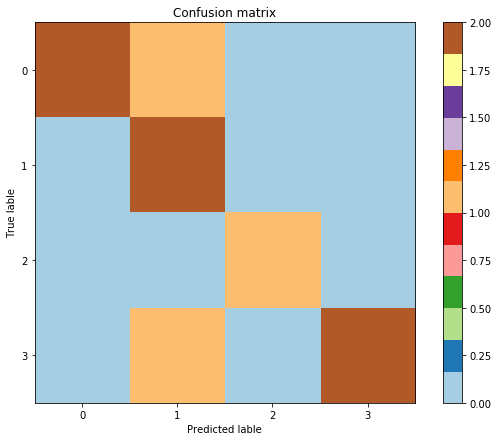

In [24]:
y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3]
confusion_mat = confusion_matrix(y_true, y_pred)
#画图
plot_confusion_matrix(confusion_mat)
    

从图中看，对角线的颜色很亮，我们希望它们越亮越好。蓝色色区域表示0。在非对
角线的区域有一些浅色区域，表示分类错误的样本量。例如，当样本真实标记类型是0，而预测
标记类型是1时，就像在第一行的第二格看到的那样。

## 提取性能报告

可以直接用sciklearn打印精度、召回率和F1得分

In [25]:
from sklearn.metrics import classification_report
y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3]
target_names = ['Class-0', 'Class-1', 'Class-2', 'Class-3']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Class-0       1.00      0.67      0.80         3
    Class-1       0.50      1.00      0.67         2
    Class-2       1.00      1.00      1.00         1
    Class-3       1.00      0.67      0.80         3

avg / total       0.89      0.78      0.79         9



## 2.5根据汽车特征评估质量

        我们将用一个包含汽车多种细节的数据集，例如车门数量、后备箱大小、维修成本等，来确定汽车的质量。分类的目的是把车辆的质量分成4种类型：不达标、达标、良好、优秀。
  可以从https://archive.ics.uci.edu/ml/datasets/Car+Evaluation 下载数据集。

    需要把数据集中的每个值看成是字符串。考虑数据集中的6个属性，其取值范围是这样的：
     buying：取值范围是vhigh、high、med、low；
     maint：取值范围是vhigh、high、med、low；
     doors：取值范围是2、3、4、5等；
     persons：取值范围是2、4等；
     lug_boot：取值范围是small、med、big；
     safety：取值范围是low、med、high。
    考虑到每一行都包含字符串属性，需要假设所有特征都是字符串，并设置分类器。

In [42]:
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
 
#画图时显示中文字体
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
 
input_file=r'car.data.txt'
x=[]
count=0
 
with open(input_file,'r') as f:
    for line in f.readlines():
        data=line[:-1].split(',')
        x.append(data)
x=np.array(x)
 

    每一行都包含由逗号分隔的单词列表。因此，我们解析输入文件，对每一行进行分割，然后
    将该列表附加到主数据。我们忽略每一行最后一个字符，因为那是一个换行符。由于Python程序
    包只能处理数值数据，所以需要把这些属性转换成程序包可以理解的形式。

In [43]:
#字符串转数值
label_encoder=[]
x_encoded=np.empty(x.shape)
 
for i,item in enumerate(x[0]):
    label_encoder.append(preprocessing.LabelEncoder())
    label_encoder[-1].fit(x[:,i])
    x_encoded[:,i]=label_encoder[-1].transform(x[:,i])
x=x_encoded[:, :-1].astype(int)
y=x_encoded[:,-1].astype(int)
 

由于每个属性可以取有限数量的数值，所以可以用标记编码器将它们转换成数字。我们需要
为不同的属性使用不同的标记编码器，例如，lug_boot属性可以取3个不同的值，需要建立一个
懂得给这3个属性编码的标记编码器。每一行的最后一个值是类，将它赋值给变量y。

In [44]:
#建立随机森林分类器
params = {'n_estimators': 200, 'max_depth': 8, 'random_state':7}
classifiler = RandomForestClassifier(**params)
classifiler.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [45]:
#交叉验证
from sklearn import cross_validation
accuracy = cross_validation.cross_val_score(classifier, x, y, scoring='accuracy',cv=3)
print("Accuracy of the classifier = " + str(round(100*accuracy.mean(), 2)) + "%")

Accuracy of the classifier = 78.13%


用三折交叉验证（three-foldcross-validation，把数据分3组，轮换着用其中两组数据验证分类器）来计算分类器的准确性。

In [54]:
#建立分类器的主要目的就是要用它对孤立的和未知的数据进行分类
#对单一数据示例进行编码测试
input_data=['high','high','3','4','small','high']
input_data_encoded=[-1]*len(input_data)
 
for i,item in enumerate(input_data):
    input_data_encoded[i]=int(label_encoder[i].transform([input_data[i]]))
input_data_encoded=np.array(input_data_encoded)
print('数组重塑前:',input_data_encoded)

#预测并打印数据点的输出
#重塑数组
input_data_encoded=input_data_encoded.reshape(1,6)
print('数组重塑后:',input_data_encoded)
output_class=classifier.predict(input_data_encoded)
print('Output class（输出类型）:',label_encoder[-1].inverse_transform(output_class)[0])

数组重塑前: [0 0 1 1 2 0]
数组重塑后: [[0 0 1 1 2 0]]


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

用predict方法估计输出类型。如果输出被编码的输出标记，那么它对我们没有任何意
义。因此，用inverse_transform方法对标记进行解码，将它转换成原来的形式，然后打印输
出类。

In [48]:
#定义随机森林回归器的超参数
#测试评估器数量参数对分类器的影响
classifier = RandomForestClassifier(max_depth=4, random_state=7)
parameter_grid = np.linspace(25, 200, 8).astype(int)
train_scores, validation_scores = validation_curve(classifier, x, y, 
        'n_estimators', parameter_grid, cv=5)
print('\n##### 验证曲线 #####')
print('\nParam: n_estimators\nTraining scores:\n', train_scores)
print('\nParam: n_estimators\nValidation scores:\n', validation_scores)


##### 验证曲线 #####

Param: n_estimators
Training scores:
 [[ 0.80680174  0.80824891  0.80752533  0.80463097  0.81358382]
 [ 0.79522431  0.80535456  0.81041968  0.8089725   0.81069364]
 [ 0.80101302  0.80680174  0.81114327  0.81476122  0.8150289 ]
 [ 0.8024602   0.80535456  0.81186686  0.80752533  0.80346821]
 [ 0.80028944  0.80463097  0.81114327  0.80824891  0.81069364]
 [ 0.80390738  0.80535456  0.81041968  0.80969609  0.81647399]
 [ 0.80390738  0.80463097  0.81114327  0.81476122  0.81719653]
 [ 0.80390738  0.80607815  0.81114327  0.81403763  0.81647399]]

Param: n_estimators
Validation scores:
 [[ 0.71098266  0.76589595  0.72543353  0.76300578  0.75290698]
 [ 0.71098266  0.75433526  0.71965318  0.75722543  0.74127907]
 [ 0.71098266  0.72254335  0.71965318  0.75722543  0.74418605]
 [ 0.71098266  0.71387283  0.71965318  0.75722543  0.72674419]
 [ 0.71098266  0.74277457  0.71965318  0.75722543  0.74127907]
 [ 0.71098266  0.74277457  0.71965318  0.75722543  0.74127907]
 [ 0.71098266  0.74

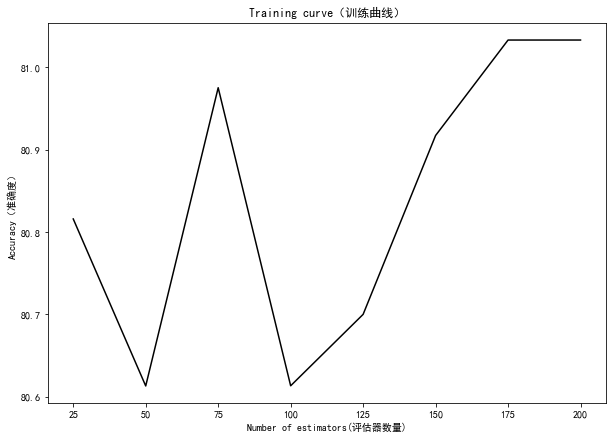

In [49]:
#画图
plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis=1), color='black')
plt.title(u'Training curve（训练曲线）')
plt.xlabel(u'Number of estimators(评估器数量)')
plt.ylabel(u'Accuracy（准确度）')
plt.show()

In [50]:
#测试最大深度参数对分类器的影响
classifier = RandomForestClassifier(n_estimators=20, random_state=7)
parameter_grid = np.linspace(2, 10, 5).astype(int)
train_scores, valid_scores = validation_curve(classifier, x, y, 
        'max_depth', parameter_grid, cv=5)
print(u'\nParam: max_depth\nTraining scores:\n', train_scores)
print(u'\nParam: max_depth\nValidation scores:\n', validation_scores)


Param: max_depth
Training scores:
 [[ 0.71852388  0.70043415  0.70043415  0.70043415  0.69942197]
 [ 0.80607815  0.80535456  0.80752533  0.79450072  0.81069364]
 [ 0.90665702  0.91027496  0.92836469  0.89797395  0.90679191]
 [ 0.97467438  0.96743849  0.96888567  0.97829233  0.96820809]
 [ 0.99421129  0.99710564  0.99782923  0.99855282  0.99277457]]

Param: max_depth
Validation scores:
 [[ 0.71098266  0.76589595  0.72543353  0.76300578  0.75290698]
 [ 0.71098266  0.75433526  0.71965318  0.75722543  0.74127907]
 [ 0.71098266  0.72254335  0.71965318  0.75722543  0.74418605]
 [ 0.71098266  0.71387283  0.71965318  0.75722543  0.72674419]
 [ 0.71098266  0.74277457  0.71965318  0.75722543  0.74127907]
 [ 0.71098266  0.74277457  0.71965318  0.75722543  0.74127907]
 [ 0.71098266  0.74566474  0.71965318  0.75722543  0.74418605]
 [ 0.71098266  0.75144509  0.71965318  0.75722543  0.74127907]]


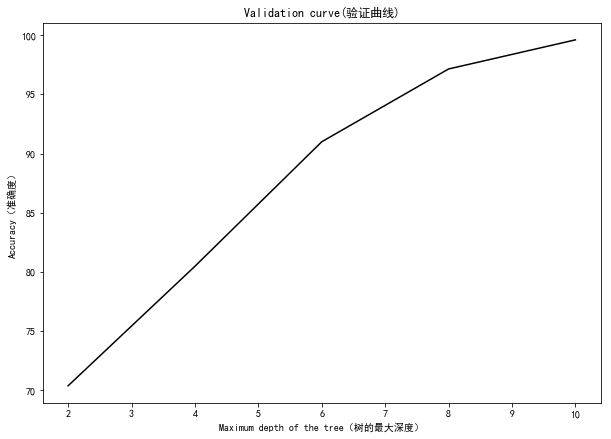

In [51]:
#画图
plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis=1), color='black')
plt.title(u'Validation curve(验证曲线)')
plt.xlabel(u'Maximum depth of the tree（树的最大深度）')
plt.ylabel(u'Accuracy（准确度）')
plt.show()


##### 学习曲线 #####

Training scores:
 [[ 1.          1.          1.          1.          1.        ]
 [ 1.          1.          0.998       0.998       0.998     ]
 [ 0.99875     0.9975      0.99875     0.99875     0.99875   ]
 [ 0.99818182  0.99545455  0.99909091  0.99818182  0.99818182]]

Validation scores:
 [[ 0.69942197  0.69942197  0.69942197  0.69942197  0.70348837]
 [ 0.74855491  0.65028902  0.76878613  0.76589595  0.70348837]
 [ 0.70520231  0.78612717  0.52312139  0.76878613  0.77034884]
 [ 0.65028902  0.75433526  0.65317919  0.75433526  0.76744186]]


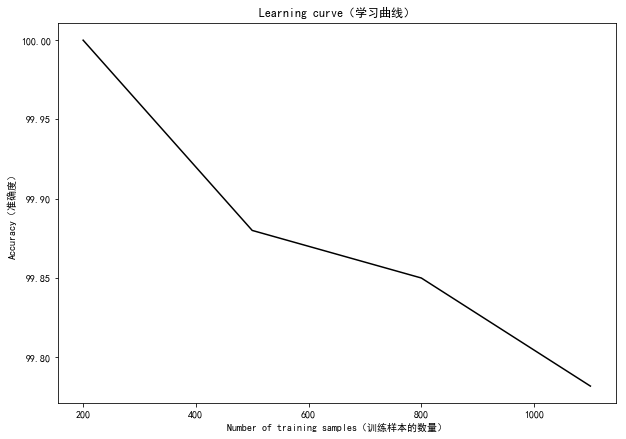

In [52]:
#生成学习曲线
classifier = RandomForestClassifier(random_state=7)
 
parameter_grid = np.array([200, 500, 800, 1100])
train_sizes, train_scores, validation_scores = learning_curve(classifier, 
        x, y, train_sizes=parameter_grid, cv=5)
 
print('\n##### 学习曲线 #####')
print('\nTraining scores:\n', train_scores)
print('\nValidation scores:\n', validation_scores)
 
#画图
plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis=1), color='black')
plt.title(u'Learning curve（学习曲线）')
plt.xlabel(u'Number of training samples（训练样本的数量）')
plt.ylabel(u'Accuracy（准确度）')
plt.show()
 